#Task 2: Линейная диаграмма со стилями#
Класс! Помните, что у нас есть данные о коммитах? Было бы полезно нарисовать обе метрики времени на одном графике. Что, если мы увидим закономерности?

Вам нужно создать точно такой же график, как показано ниже (и по значениям, и по стилю):


*   Анализируйте только пользователей, а не администраторов.
*   Используйте фильтр status = 'ready' для коммитов.
*   Анализируйте только те даты, когда были зафиксированы и просмотры, и коммиты.
*   Размер шрифта — 8.
*   figsize — 15,8.
*   В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос: «Сколько раз количество просмотров превышало 150?». В ячейке ниже добавьте: «Ответ:___». Поместите в текст конкретное число вместо подчеркивания.

In [1]:
import pandas as pd
import sqlite3 as sq
from datetime import datetime
from matplotlib import pyplot as plt, dates as mdates

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
conn = sq.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
graf = pd.read_sql("""SELECT d_commits, commits, views
                      FROM
                        (SELECT DATE(timestamp) as d_commits, count(DATE(timestamp)) as commits
                        FROM checker
                        WHERE status like 'ready'
                        GROUP BY d_commits) as t_1
                        JOIN
                        (SELECT DATE(datetime) as d_views, count(DATE(datetime)) as views
                        FROM pageviews
                         WHERE uid like 'user%'
                        GROUP BY d_views) as t_2
                        ON t_1.d_commits = t_2.d_views""", conn,  parse_dates=['d_commits', 'd_views'])

In [5]:
graf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   d_commits  32 non-null     datetime64[ns]
 1   commits    32 non-null     int64         
 2   views      32 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 896.0 bytes


In [10]:
graf.shape

(32, 2)

In [6]:
graf = graf.set_index('d_commits')

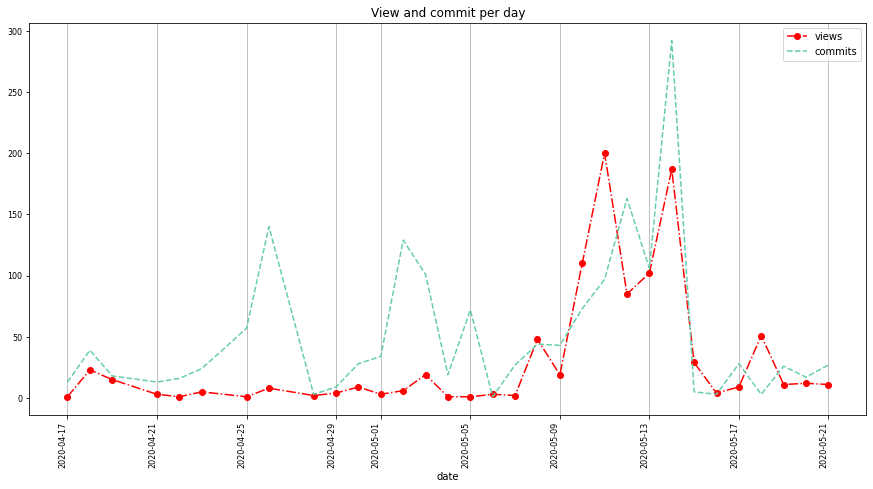

In [11]:
graf.plot(y = ['views', 'commits'],
    color = ['#FF0000', '#66CDAA'],
    style = ["o-.", "--"],
    figsize = [15, 8], rot = 90, fontsize = 8,
    title="View and commit per day",
    xlabel="date")
plt.grid(axis='x')
plt.show()

Сколько раз количество просмотров превышало 150?

Ответ: 2

In [8]:
conn.close()